### corona world data 


In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [95]:
df = pd.read_csv('worldometer_coronavirus_summary_data.csv')

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226 entries, 0 to 225
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   country                         226 non-null    object 
 1   continent                       226 non-null    object 
 2   total_confirmed                 226 non-null    int64  
 3   total_deaths                    218 non-null    float64
 4   total_recovered                 204 non-null    float64
 5   active_cases                    204 non-null    float64
 6   serious_or_critical             145 non-null    float64
 7   total_cases_per_1m_population   226 non-null    int64  
 8   total_deaths_per_1m_population  218 non-null    float64
 9   total_tests                     212 non-null    float64
 10  total_tests_per_1m_population   212 non-null    float64
 11  population                      226 non-null    int64  
dtypes: float64(7), int64(3), object(2)
m

In [97]:
df_clean = df.drop(columns=['serious_or_critical'], axis=1)
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226 entries, 0 to 225
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   country                         226 non-null    object 
 1   continent                       226 non-null    object 
 2   total_confirmed                 226 non-null    int64  
 3   total_deaths                    218 non-null    float64
 4   total_recovered                 204 non-null    float64
 5   active_cases                    204 non-null    float64
 6   total_cases_per_1m_population   226 non-null    int64  
 7   total_deaths_per_1m_population  218 non-null    float64
 8   total_tests                     212 non-null    float64
 9   total_tests_per_1m_population   212 non-null    float64
 10  population                      226 non-null    int64  
dtypes: float64(6), int64(3), object(2)
memory usage: 19.6+ KB


In [98]:
# Drop rows where any of the values in these specific columns are missing
df_clean.dropna(subset=['total_deaths', 'total_recovered', 'active_cases', 'total_tests'], inplace=True)

df_clean.info()


<class 'pandas.core.frame.DataFrame'>
Index: 191 entries, 0 to 225
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   country                         191 non-null    object 
 1   continent                       191 non-null    object 
 2   total_confirmed                 191 non-null    int64  
 3   total_deaths                    191 non-null    float64
 4   total_recovered                 191 non-null    float64
 5   active_cases                    191 non-null    float64
 6   total_cases_per_1m_population   191 non-null    int64  
 7   total_deaths_per_1m_population  191 non-null    float64
 8   total_tests                     191 non-null    float64
 9   total_tests_per_1m_population   191 non-null    float64
 10  population                      191 non-null    int64  
dtypes: float64(6), int64(3), object(2)
memory usage: 17.9+ KB


Text(0.5, 1.0, 'the country wise total death')

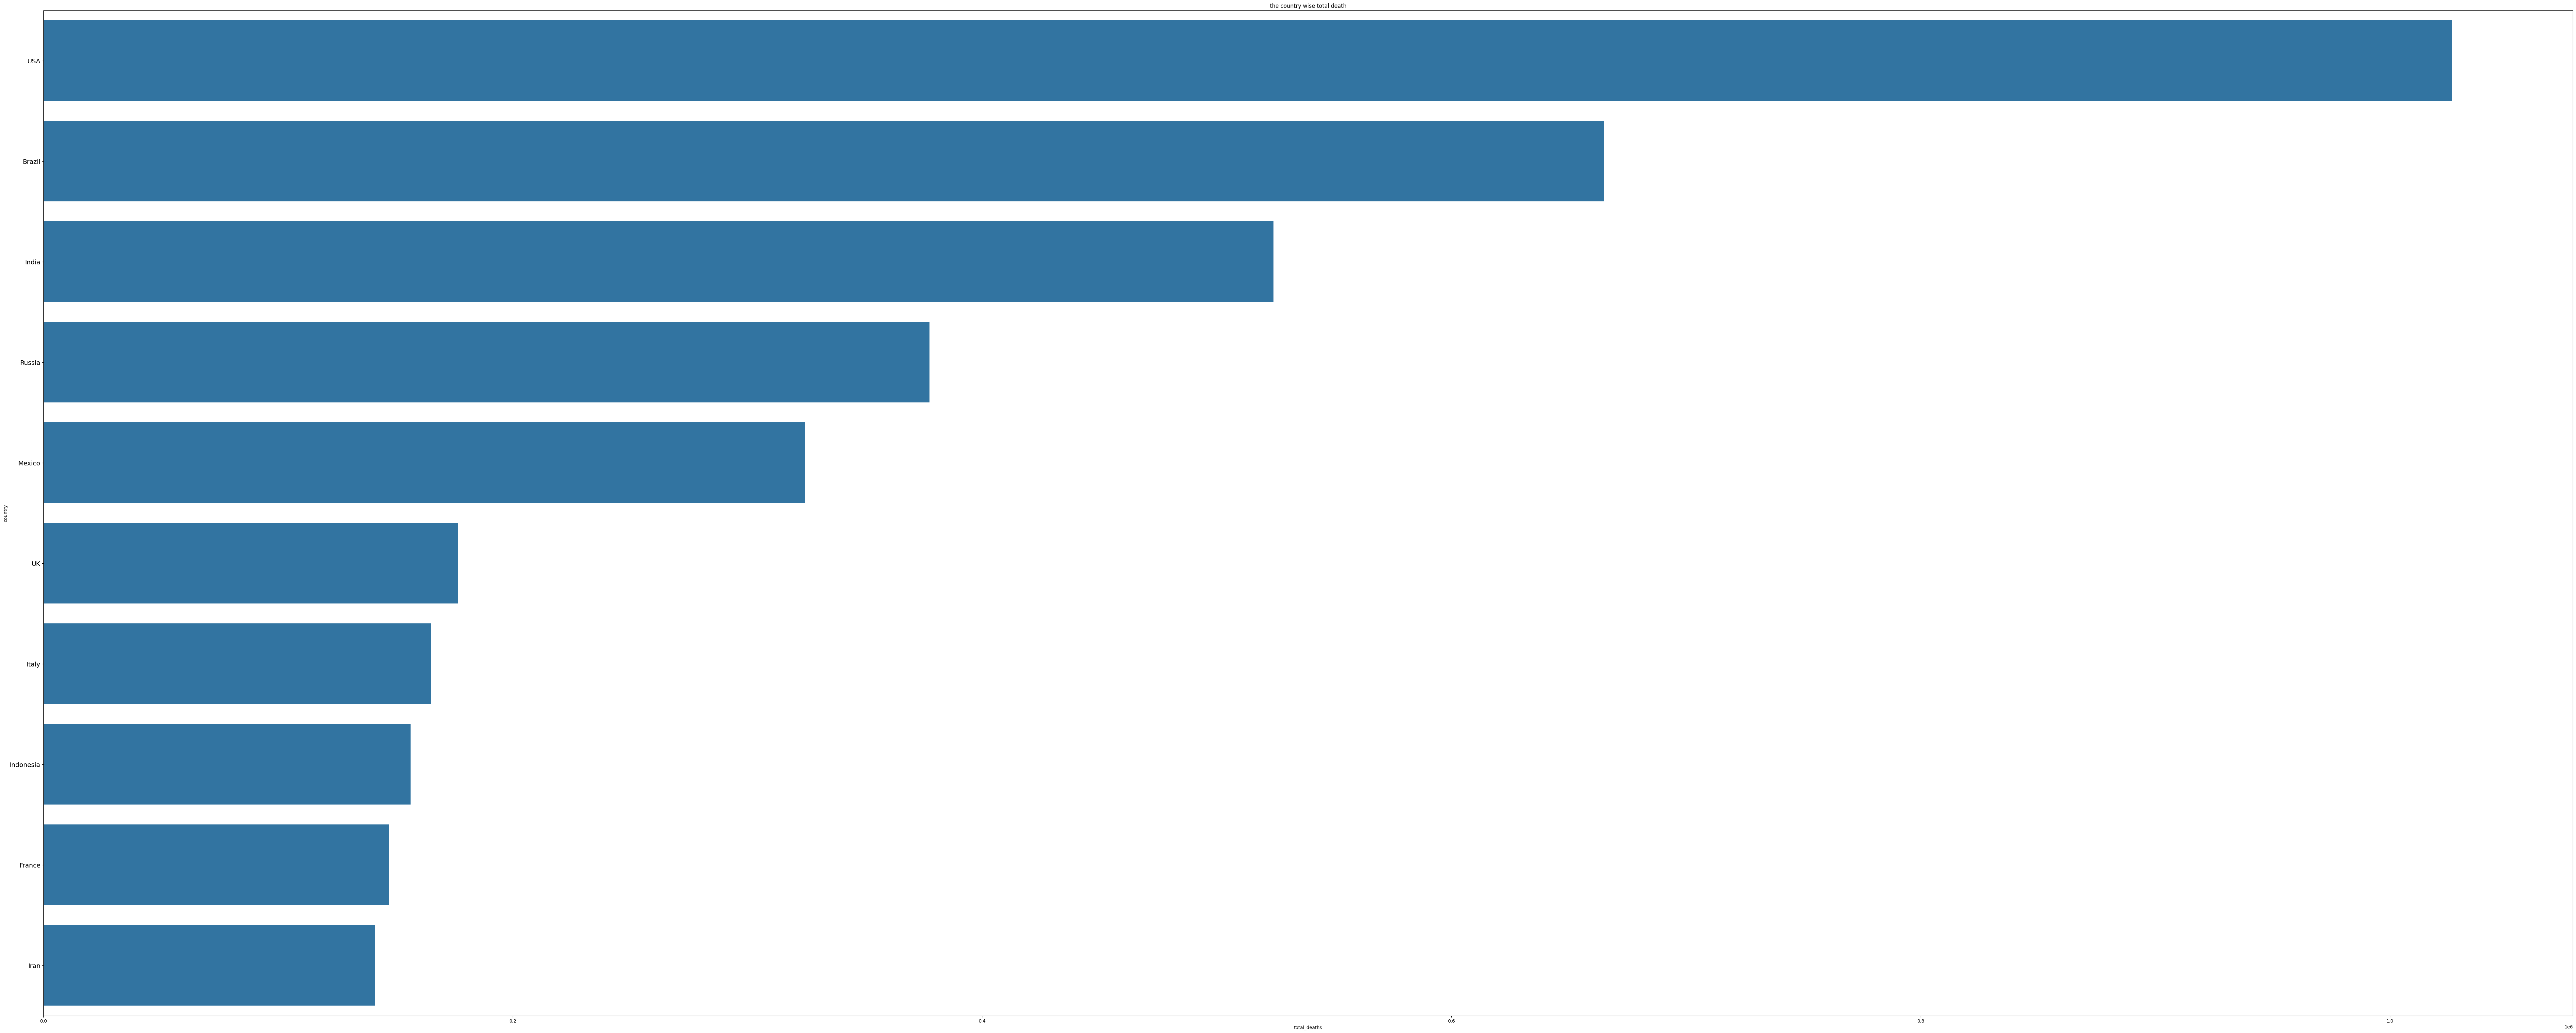

In [99]:
df_head = df_clean.sort_values(by='total_deaths', ascending=False).head(10)
plt.figure(figsize=(100,40))
ax = sns.barplot(x='total_deaths', y='country', data=df_head)
ax.tick_params(axis='y', labelsize=14)
plt.title('the country wise total death')

Text(0.5, 1.0, 'the country wise total death')

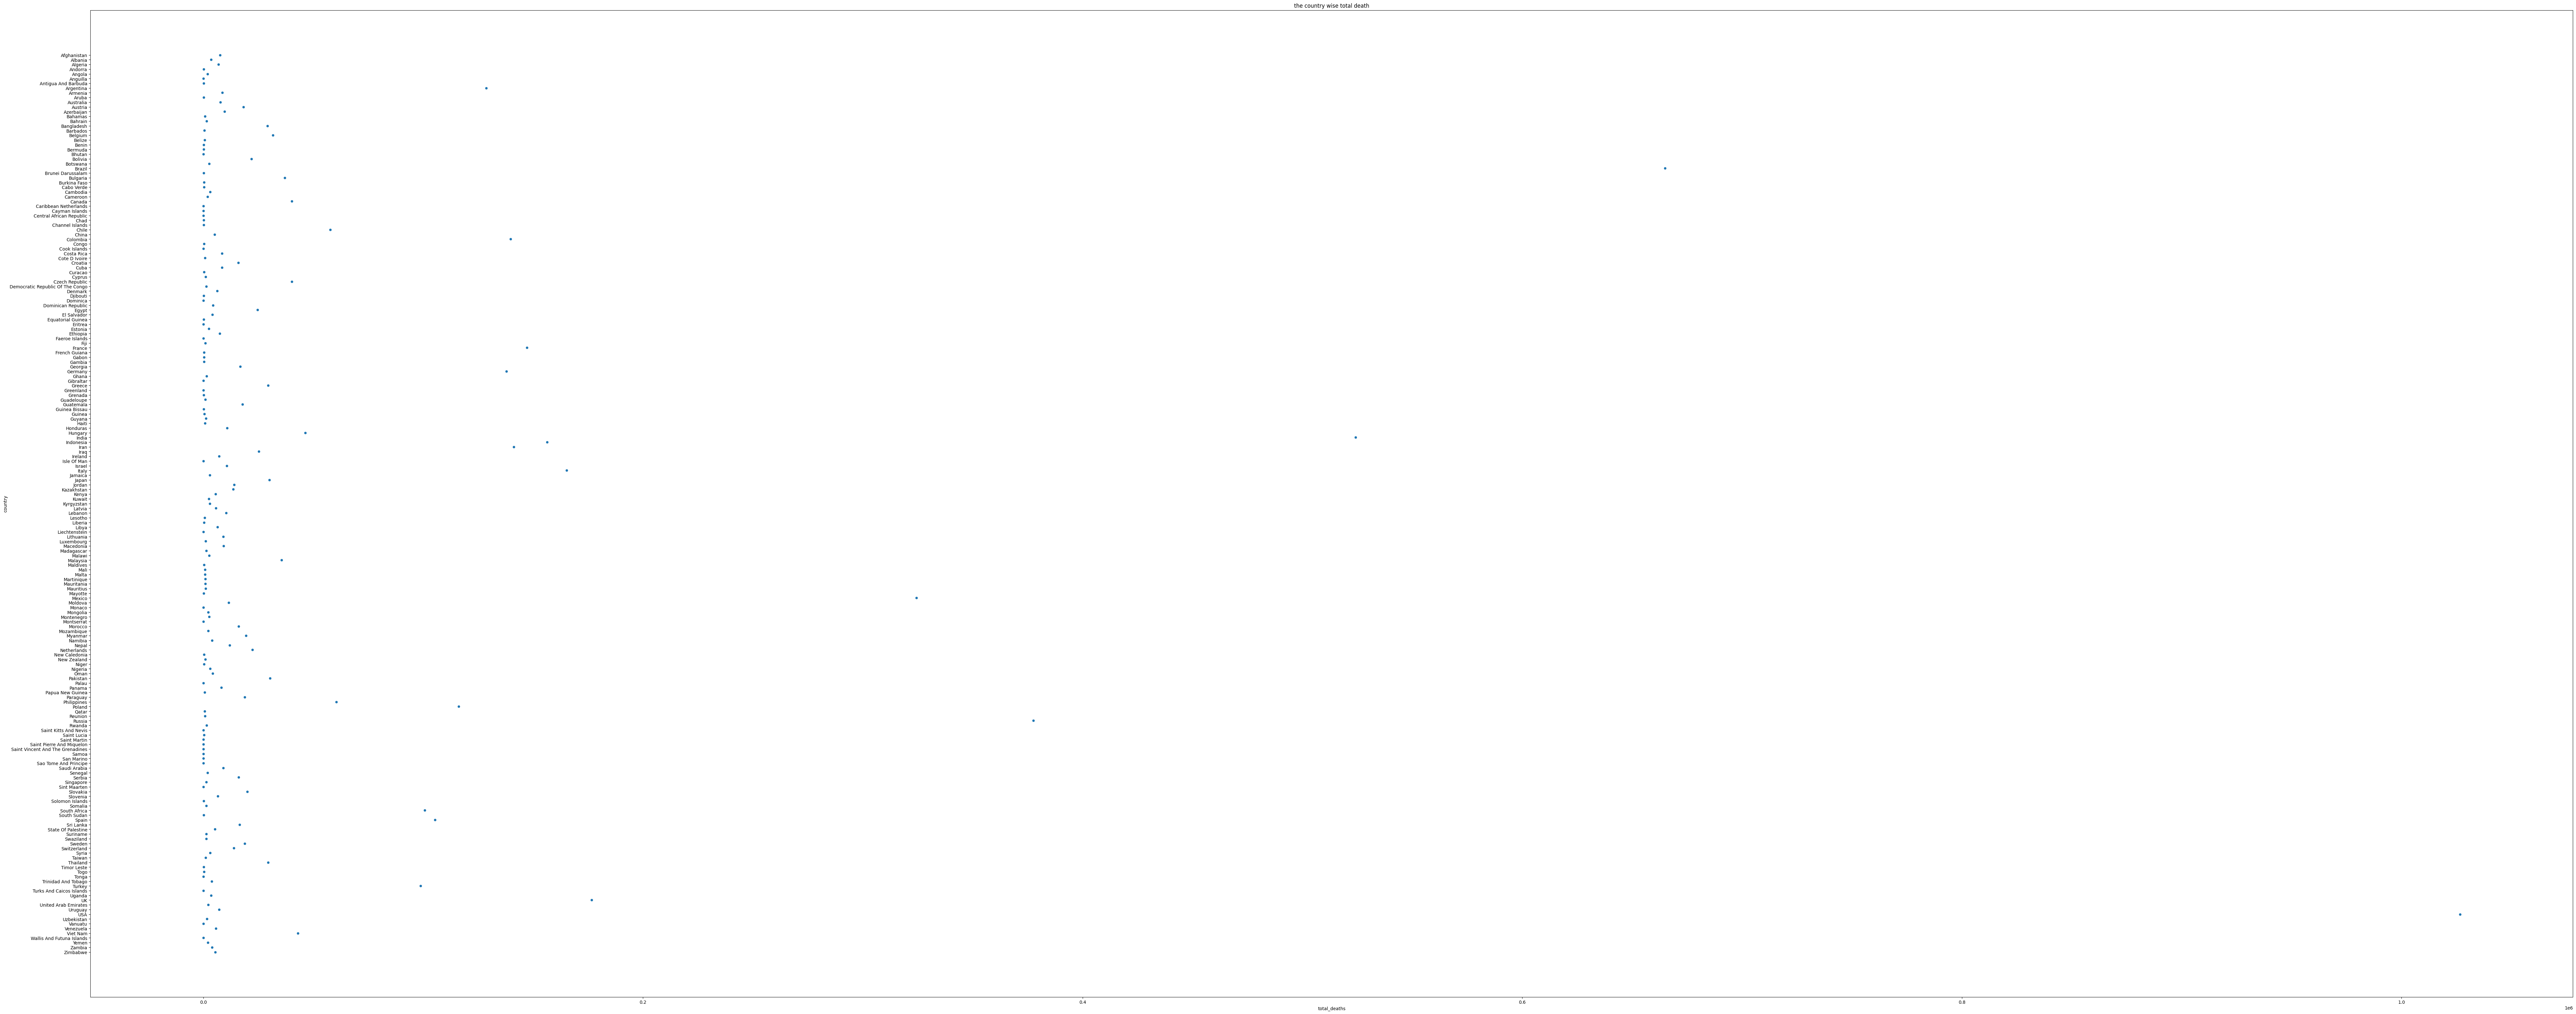

In [100]:
plt.figure(figsize=(100,40))
sns.scatterplot(x='total_deaths', y='country', data=df_clean)
plt.title('the country wise total death')

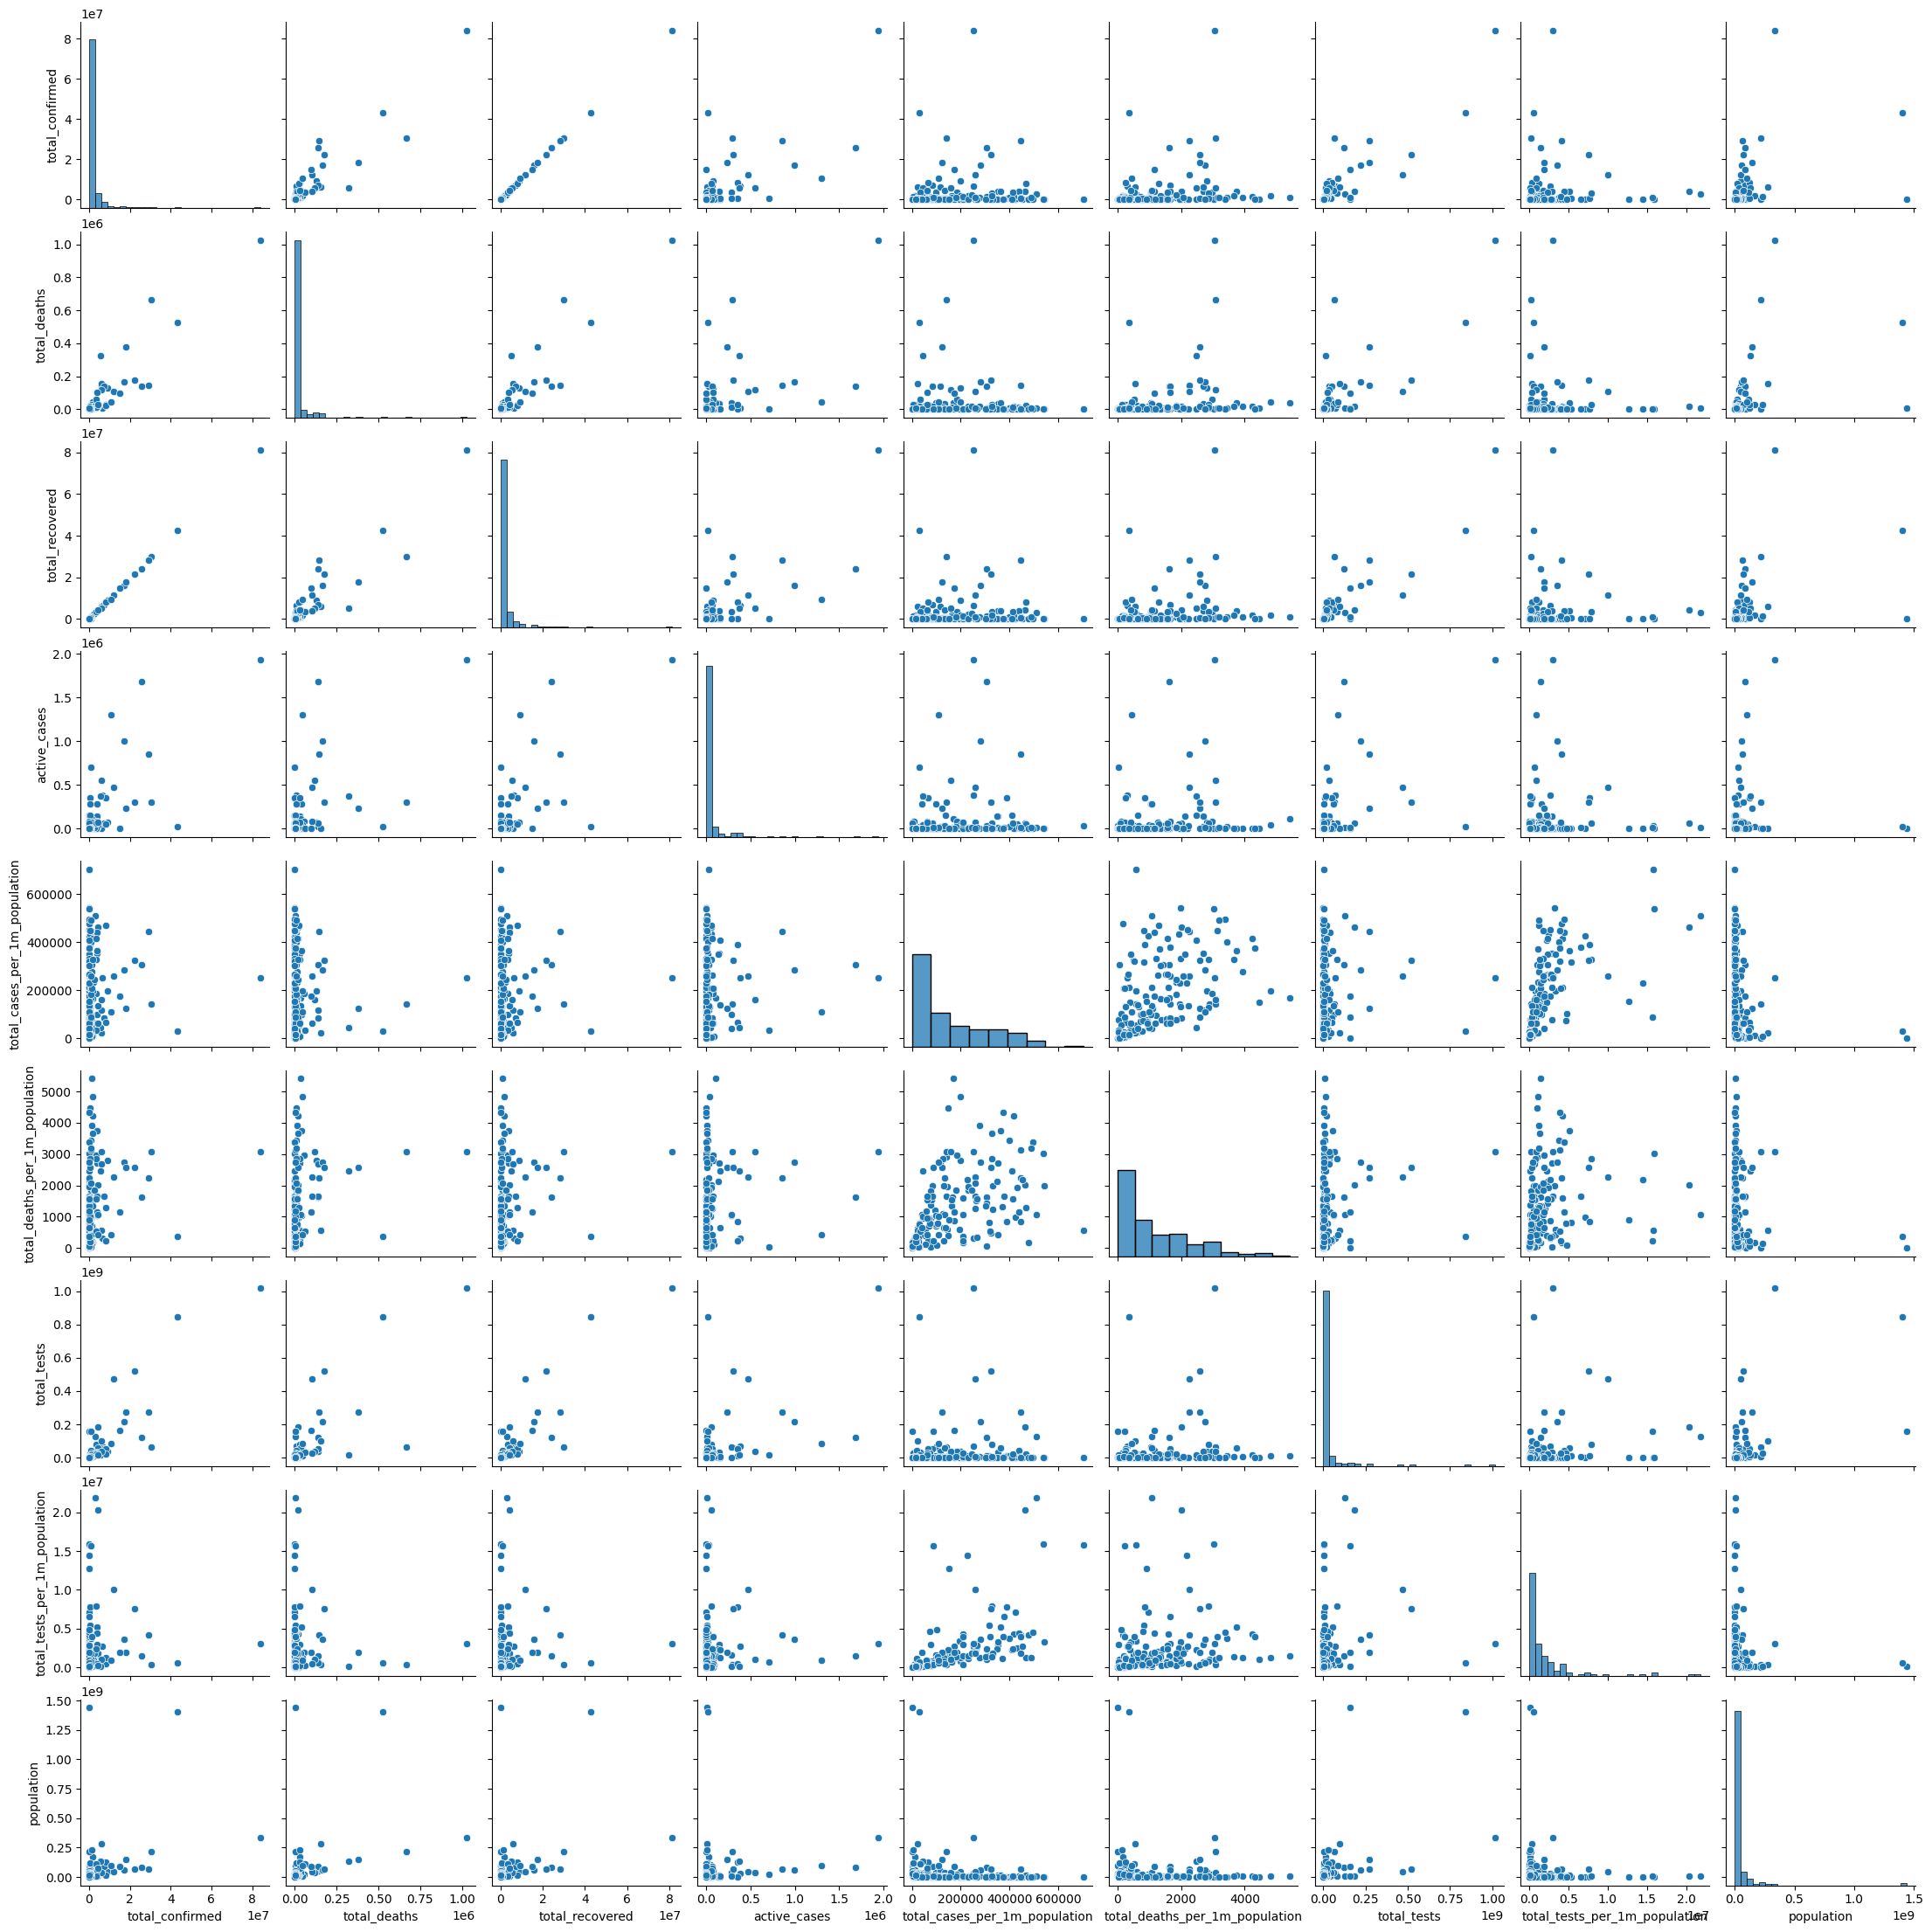

In [101]:
sns.pairplot(df_clean)

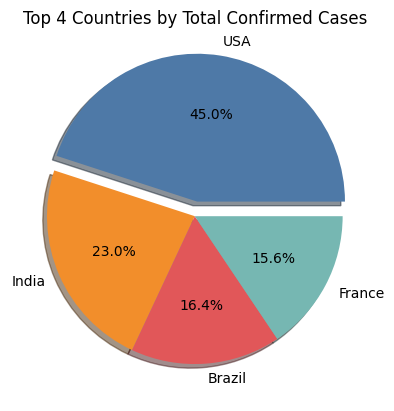

In [102]:
# Select top 4 countries by total_confirmed cases for the pie chart
top4 = df_clean.nlargest(4, 'total_confirmed')

colors = ['#4e79a7', '#f28e2b', '#e15759', '#76b7b2']
explode = (0.1, 0, 0, 0)  # explode the 1st slice

plt.pie(
    top4['total_confirmed'],
    explode=explode,
    labels=top4['country'].tolist(),
    colors=colors,
    autopct='%1.1f%%',
    shadow=True
)
plt.title('Top 4 Countries by Total Confirmed Cases')
plt.show()